In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing

In [2]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV


In [3]:
os.chdir('E:\\Analytics\\Analytics Vidhya\\Bigmart sales\\2nd data feature')

In [4]:
# Loading the train data
train = pd.read_csv('train.csv')

In [5]:
# Loading the test data
test = pd.read_csv('test.csv')

In [6]:
# Checking first 5 rows of train data
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [6]:
# Getting the strucutre of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Check missing values in train dataset
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#train data has 1,463 missing values of 'Item_Weight' and 2,410 missing values of 'Outlet_Size'

In [8]:
# Checking first 5 rows of train data
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
# Getting the strucutre of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
#Check missing values in test dataset
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
#test data has 976 missing values of 'Item_Weight' and 1,606 missing values of 'Outlet_Size'

In [14]:
# Before proceding with EDA and imputing missing values, I will combine both train and test datasets into a single dataset

In [11]:
# putting
train_sales = train['Item_Outlet_Sales']

In [12]:
del train['Item_Outlet_Sales']

In [13]:
combined_data = pd.concat([train,test] )

In [ ]:
################ DELETE BELOW ################

In [15]:
pd.crosstab(combined_data['Outlet_Size'], combined_data['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [14]:
combined_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
pd.crosstab(combined_data['Outlet_Size'], combined_data['Outlet_Location_Type'])
#Missing 'Outlet_Size'

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [17]:
pd.crosstab(combined_data['Outlet_Size'], combined_data['Outlet_Type'])
#Missing 'Outlet_Size'

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [18]:
pd.crosstab(combined_data['Outlet_Location_Type'], combined_data['Outlet_Type'])
#all correct

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,880,3100,0,0
Tier 2,0,4641,0,0
Tier 3,925,1553,1546,1559


In [ ]:
################ DELETE ABOVE ################

In [18]:
# Checking first 5 rows of train data
combined_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [19]:
# Checking the unique number of 'Item_Identifier'
combined_data['Item_Identifier'].nunique()

1559

In [20]:
# Each item will have a unique weight. So for imputing the missing values of 'Item_Weight', I can make use of 'Item_Identifier'

#First, I will create a dictionary of 'Item_Identifier' with their corresponding 'Item_Weight'
#Then, if 'Item_Weight' is missing in a particular row, then impute its value based on the 'Item_Identifier' from dictionary

In [21]:
# Impute missing values of 'Item_Weight'

#Create dictionary of 'Item_Identifier' by mode of 'Item_Weight'
map1=dict(combined_data.groupby(['Item_Identifier'])['Item_Weight'].median())

# Imputing missing values 
combined_data.loc[combined_data['Item_Weight'].isna(),'Item_Weight'] = combined_data.loc[combined_data['Item_Weight'].isna(),'Item_Identifier'].apply( lambda x:map1[x])

In [22]:
# Checking missing values in 'Item_Weight'
combined_data['Item_Weight'].isnull().sum()

0

In [23]:
# Checking value count for 'Item_Fat_Content'
combined_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [24]:
# 'Low Fat' , 'LF' and 'low fat' belong to the same category
# Similarly, 'Regular' and 'reg' belong to the same category

In [25]:
#Replace LF with Low Fat
combined_data.replace(to_replace ="LF", value ="Low Fat", inplace=True)

#Replace low fat with Low Fat
combined_data.replace(to_replace ="low fat", value ="Low Fat", inplace=True)

#Replace reg with Regular
combined_data.replace(to_replace ="reg", value ="Regular", inplace=True)

In [26]:
combined_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

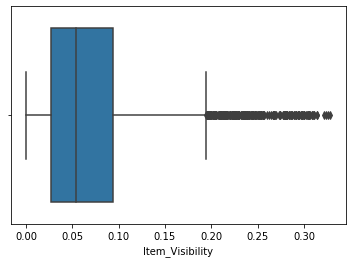

In [28]:
#Plotting the boxplot for 'Item_Visibility'
sns.boxplot(combined_data['Item_Visibility'])

In [29]:
# Above boxplot shows that 'Item_Visibility' has outliers as well.

In [30]:
# Checking the statistics for 'Item_Visibility'
combined_data['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [31]:
# minimum value for 'Item_Visibility' = 0 which does not makes sense.
# This means, there are missing values in 'Item_Visibility' too

#'Item_Visibility' will depend on the 'Outlet_Type' because if the outlet is bigger, it's items will have higher visibility

In [32]:
# Impute missing values of 'Item_Visibility'

#'Item_Visibility' is rounded to 3 decimal places
combined_data['Item_Visibility'] = combined_data['Item_Visibility'].apply(lambda x:round(x,3) )

#For != Grocery
map2 = dict(combined_data[combined_data['Outlet_Type']!='Grocery Store'].groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.mode().iloc[0]) )

#For ==Grocery
map3 = dict(combined_data[combined_data['Outlet_Type']=='Grocery Store'].groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.mode().iloc[0]) )

#Impute Values of 'Item_Visibility'
for j in range(len(combined_data)):
    if combined_data.iloc[j,3]==0:
        if combined_data.iloc[j,10] == "Grocery Type":
            combined_data.iloc[j,3] = map3[combined_data.iloc[j,0]]
        else:
            combined_data.iloc[j,3] = map2[combined_data.iloc[j,0]]

In [33]:
combined_data['Item_Visibility'].describe()

count    14204.000000
mean         0.069971
std          0.049861
min          0.000000
25%          0.031000
50%          0.058000
75%          0.097000
max          0.328000
Name: Item_Visibility, dtype: float64

In [34]:
#'Item_Visibility' still has some values as 0, which is practically not possible.
# Hence, I will impute all 0 values with mean value

In [35]:
# Checking the number of values which are 0
len(combined_data[combined_data['Item_Visibility']==0])

15

In [36]:
# Replacing all 0 valueso of 'Item_Visibility' with mean
combined_data['Item_Visibility'] = np.where(combined_data['Item_Visibility']==0, combined_data['Item_Visibility'].mean(), combined_data['Item_Visibility'])

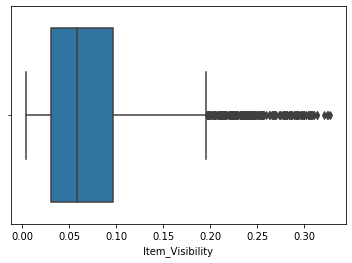

In [37]:
sns.boxplot(combined_data['Item_Visibility'])

In [38]:
# Take square root of right skewed distribution to convert into normal distribution
combined_data['Item_Visibility'] = combined_data['Item_Visibility'].apply(lambda x: math.sqrt(x))

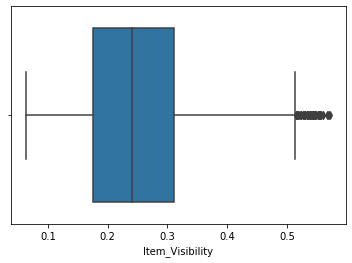

In [39]:
sns.boxplot(combined_data['Item_Visibility'])

In [40]:
# Checking the value counts of 'Item_Type'
combined_data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [41]:
# There are 16 categories in 'Item_Type'
# Taking dummy variables for so many categories will not give proper results in final regression output.
# Hence, I will try to reduce the number of categories of 'Item_Type'

In [42]:
# Shorten number of categories in 'Item_Type'

#Create a new column
combined_data['item_short'] = combined_data['Item_Identifier']

#Keep only first 2 character of 'Item_Identifier'
combined_data['item_short'] = combined_data['item_short'].apply(lambda x:x[:2])

#Pivot table of 'Item_Type' and 'Item_Identifier'
pd.crosstab( combined_data['Item_Type'] , combined_data['item_short'])

item_short,DR,FD,NC
Item_Type,,,
Baking Goods,0,1086,0
Breads,0,416,0
Breakfast,0,186,0
Canned,0,1084,0
Dairy,229,907,0
Frozen Foods,0,1426,0
Fruits and Vegetables,0,2013,0
Hard Drinks,362,0,0
Health and Hygiene,0,0,858


In [43]:
# Except 'Dairy' all other 'Item_Type' belong to only 1 item_short
# Hence 'Item_Type' can be divided into 3 categories of 'DR' , 'FD' and NC'

item_dict = {'Dairy'       : 'FD', 
             'Soft Drinks' : 'DR', 
             'Meat'        : 'FD', 
             'Fruits and Vegetables' : 'FD' ,
             'Household'   : 'NC',
             'Baking Goods': 'FD', 
             'Snack Foods' : 'FD', 
             'Frozen Foods': 'FD',
             'Breakfast'   : 'FD', 
             'Health and Hygiene'   : 'NC', 
             'Hard Drinks' : 'DR',
             'Canned'      : 'FD', 
             'Breads'      : 'FD', 
             'Starchy Foods': 'FD', 
             'Others'      : 'NC', 
             'Seafood'     : 'FD' }

In [44]:
#Replacing values of 'Item_Type'
combined_data['Item_Type']= combined_data['Item_Type'].map(item_dict)

In [45]:
del combined_data['item_short']

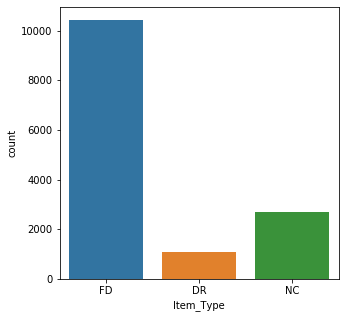

In [46]:
#Making the countplot for 'Item_Type'
plt.figure( figsize= (5,5) )
sns.countplot(combined_data['Item_Type'])

In [47]:
combined_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.126491,FD,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.137840,DR,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.130384,FD,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.151658,FD,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.114018,NC,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


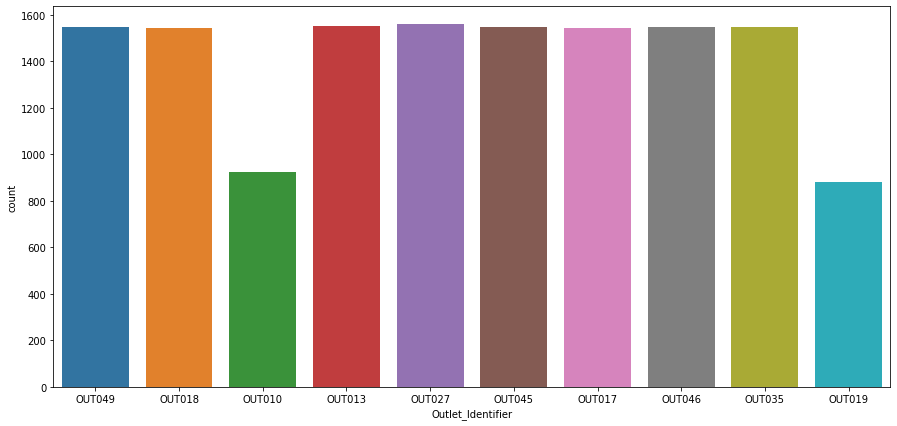

In [48]:
#Making the countplot for 'Outlet_Identifier'
plt.figure( figsize= (15,7) )
sns.countplot(combined_data['Outlet_Identifier'])

In [49]:
# There are 10 outlets
# Also 'Outlet_Establishment_Year' should be correlated to 'Outlet_Identifier' 
# as each outlet would have been opened in one particular year

In [50]:
pd.crosstab(combined_data['Outlet_Identifier'] , combined_data['Outlet_Establishment_Year'])

Outlet_Establishment_Year,1985,1987,1997,1998,1999,2002,2004,2007,2009
Outlet_Identifier,,,,,,,,,
OUT010,0,0,0,925,0,0,0,0,0
OUT013,0,1553,0,0,0,0,0,0,0
OUT017,0,0,0,0,0,0,0,1543,0
OUT018,0,0,0,0,0,0,0,0,1546
OUT019,880,0,0,0,0,0,0,0,0
OUT027,1559,0,0,0,0,0,0,0,0
OUT035,0,0,0,0,0,0,1550,0,0
OUT045,0,0,0,0,0,1548,0,0,0
OUT046,0,0,1550,0,0,0,0,0,0


In [51]:
# Checking the value counts of 'Outlet_Size'
combined_data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [52]:
# But as found out earlier, 'Outlet_Size' has missing values

# Those missing values can be imputed from checking the relation between 'Outlet_Size' ,'Outlet_Type' and 'Outlet_Location_Type'

In [53]:
pd.crosstab(combined_data['Outlet_Size'], combined_data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [54]:
pd.crosstab(combined_data['Outlet_Location_Type'], combined_data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,880,3100,0,0
Tier 2,0,4641,0,0
Tier 3,925,1553,1546,1559


In [55]:
pd.crosstab(combined_data['Outlet_Size'], combined_data['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [56]:
#Imputing missing values of 'Outlet_Size'
combined_data['Outlet_Size'] = np.where(((combined_data['Outlet_Type']=='Grocery Store') &(combined_data['Outlet_Size'].isna())), 'Medium',combined_data['Outlet_Size'])
combined_data['Outlet_Size'] = np.where(((combined_data['Outlet_Type']=='Supermarket Type1') &(combined_data['Outlet_Size'].isna())) , 'Medium',combined_data['Outlet_Size'])

In [57]:
pd.crosstab(combined_data['Outlet_Size'], combined_data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,925,4641,1546,1559
Small,880,3100,0,0


In [58]:
#Again checking for missing values in 'Outlet_Size'
combined_data['Outlet_Size'].isnull().sum()

0

In [59]:
combined_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.126491,FD,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.137840,DR,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.130384,FD,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.151658,FD,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.114018,NC,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [60]:
# Converting all categorical variables to numerical value

In [61]:
#Convert categorical data to dummy data
cat_names= ["Item_Identifier",
            'Item_Fat_Content',
            "Item_Type",
            "Outlet_Identifier",
            "Outlet_Establishment_Year",
            "Outlet_Size",
            "Outlet_Location_Type",
            "Outlet_Type",
            ]

for i in cat_names:
    combined_data[i] = combined_data[i].astype('category')
    combined_data[i] = combined_data[i].cat.codes

In [62]:
combined_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.126491,1,249.8092,9,4,1,0,1
1,8,5.92,1,0.137840,0,48.2692,3,8,1,2,2
2,662,17.50,0,0.130384,1,141.6180,9,4,1,0,1
3,1121,19.20,1,0.151658,1,182.0950,0,3,1,2,0
4,1297,8.93,0,0.114018,2,53.8614,1,1,0,2,1


In [63]:
# Checking the distribution of all numerical variables and then normalizing them

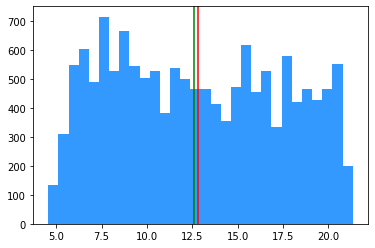

<Figure size 432x288 with 0 Axes>

In [64]:
# Plotting histogram to check values of 'Item_Weight'
plt.hist(combined_data['Item_Weight'], bins= 30, color ='#3399ff')
plt.axvline(combined_data['Item_Weight'].mean(), color= 'red')
plt.axvline(combined_data['Item_Weight'].median(), color = 'green')
plt.show()
plt.clf()

In [65]:
# Normalize values of 'Item_Weight'
z = pd.DataFrame(combined_data['Item_Weight'])
min_max_scalar = preprocessing.MinMaxScaler()
norm_weight = min_max_scalar.fit_transform(z)

combined_data['Item_Weight'] = norm_weight

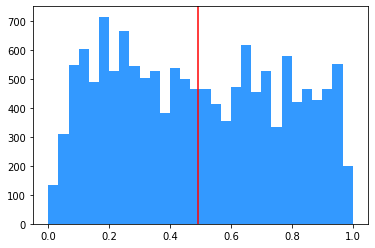

<Figure size 432x288 with 0 Axes>

In [66]:
# Plotting histogram again to check the normalized values of 'Item_Weight'
plt.hist(combined_data['Item_Weight'], bins= 30, color ='#3399ff')
plt.axvline(combined_data['Item_Weight'].mean(), color= 'red')
#plt.axvline(norm_mrp.median(), color = 'green')
plt.show()
plt.clf()

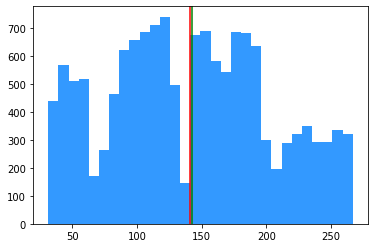

<Figure size 432x288 with 0 Axes>

In [67]:
# Plotting histogram to check values of 'Item_MRP'
plt.hist(combined_data['Item_MRP'], bins= 30, color ='#3399ff')
plt.axvline(combined_data['Item_MRP'].mean(), color= 'red')
plt.axvline(combined_data['Item_MRP'].median(), color = 'green')
plt.show()
plt.clf()

In [68]:
# Normalize values of 'Item_MRP'
k = pd.DataFrame(combined_data['Item_MRP'])
min_max_scalar = preprocessing.MinMaxScaler()
norm_mrp = min_max_scalar.fit_transform(k)

combined_data['Item_MRP'] = norm_mrp

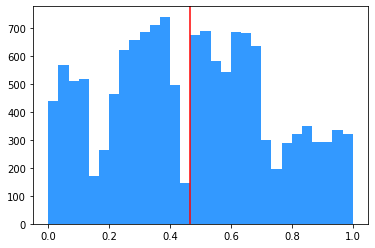

<Figure size 432x288 with 0 Axes>

In [69]:
# Plotting histogram again to check the normalized values of 'Item_MRP'
plt.hist(combined_data['Item_MRP'], bins= 30, color ='#3399ff')
plt.axvline(norm_mrp.mean(), color= 'red')
#plt.axvline(norm_mrp.median(), color = 'green')
plt.show()
plt.clf()

In [70]:
# Now, normalizing all the values of combined dataset
col = combined_data.columns

for i in col[0:11] :
    combined_data[i] = ( combined_data[i] - min(combined_data[i]) ) / (max(combined_data[i]) - min(combined_data[i]))

In [71]:
combined_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.124141,0.5,0.927507,1.000000,0.500,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.146418,0.0,0.072068,0.333333,1.000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.131782,0.5,0.468288,1.000000,0.500,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.173538,0.5,0.640093,0.000000,0.375,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.099657,1.0,0.095805,0.111111,0.125,0.0,1.0,0.333333


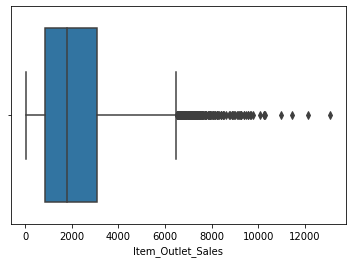

In [72]:
# Plotting boxplot for 'Item_Outlet_Sales'
sns.boxplot(train_sales)

In [73]:
# 'Item_Outlet_Sales' has outliers, as can be seen from the above boxplot
# Instead of deleting the outliers (and entire rows), I will be capping the outliers

In [74]:
#Find Bad Outliers for target variable
q75, q25 = np.percentile(train_sales, [75,25])
iqr = q75 - q25
bad_outlier = q75 + 3*iqr
bad_outlier

9902.4434

In [75]:
#cap >badoutlier of target variable to badoutlier
train_sales = np.where(train_sales>bad_outlier, bad_outlier,train_sales )

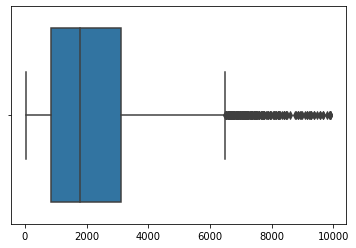

In [76]:
# Plotting boxplot for 'Item_Outlet_Sales' again
sns.boxplot(train_sales)

In [77]:
# Performing feature selection

In [78]:
train_data = combined_data.head(len(train_sales)).values
test_data = train_sales

In [79]:
# train_data has numerical values of training set after imputing missing values and normalizing
train_data

array([[0.10012837, 0.28252456, 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       [0.00513479, 0.08127419, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.42490372, 0.77076511, 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.87098845, 0.35992855, 0.        , ..., 1.        , 0.5       ,
        0.33333333],
       [0.43709884, 0.15808276, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.03209243, 0.61000298, 0.        , ..., 1.        , 0.        ,
        0.33333333]])

In [80]:
# test_data has numerical values of test set which have not been changed 
test_data

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [81]:
rf_model = RandomForestRegressor(n_estimators=100)

In [82]:
rf_model.fit(train_data , test_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [83]:
feature_imp = pd.Series(rf_model.feature_importances_, index = combined_data.columns ).sort_values(ascending=False)
feature_imp

Item_MRP                     0.445954
Outlet_Type                  0.257001
Item_Visibility              0.070677
Item_Weight                  0.070428
Item_Identifier              0.069863
Outlet_Establishment_Year    0.037905
Outlet_Identifier            0.019328
Outlet_Size                  0.009608
Item_Fat_Content             0.008035
Outlet_Location_Type         0.007254
Item_Type                    0.003945
dtype: float64

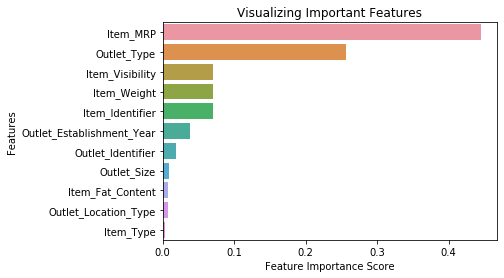

In [84]:
# Visualizing the Feature Importance
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [85]:
# From the above feature importance plot, the least important feature is 'Item_Type'
# And 2 most important features are 'Item_MRP' and 'Outlet_Type'

In [93]:
#Getting VIF values for all variables to detect multi-collinearity
X = sm.add_constant(combined_data.head(len(train_sales)))
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF Factor,features
0,51.7,const
1,2.4,Item_Identifier
2,1.0,Item_Weight
3,1.0,Item_Fat_Content
4,1.1,Item_Visibility
5,2.5,Item_Type
6,1.0,Item_MRP
7,4.1,Outlet_Identifier
8,1.0,Outlet_Establishment_Year
9,1.7,Outlet_Size


In [ ]:
# VIF for both 'Outlet_Identifier' and 'Outlet_Location_Type' are greater than 4
# This means they are both causing multi-collinearity 
# But 'Outlet_Identifier' must be included in final output file, so it cannot be removed
# Instead I will remove 'Outlet_Location_Type'

In [ ]:
# Based on the feature importance graph above I will delete three least important feature
# They are 'Item_Type' , 'Outlet_Location_Type' and 'Item_Fat_Content'

In [94]:
combined_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.124141,0.5,0.927507,1.000000,0.500,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.146418,0.0,0.072068,0.333333,1.000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.131782,0.5,0.468288,1.000000,0.500,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.173538,0.5,0.640093,0.000000,0.375,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.099657,1.0,0.095805,0.111111,0.125,0.0,1.0,0.333333


In [95]:
del combined_data['Item_Type']

In [96]:
del combined_data['Outlet_Location_Type']

In [97]:
del combined_data['Item_Fat_Content']

In [99]:
train_sales

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [ ]:
######################## PREDICTIONS START FROM HERE ########################

In [133]:
# Creating a new array 'X' which contains all the predictor variables
X= combined_data.values[0:len(train_sales)]

# Creating a new array 'Y' which contains the target variable
Y= train_sales

In [134]:
# Creating a new array 'test' which contains values of test dataset
test = combined_data.values[len(train_sales) : len(combined_data)]

In [135]:
os.chdir('E:\\Analytics\\Analytics Vidhya\\Bigmart sales\\2nd data feature')

In [136]:
# Loading the test data
add_to_prediction = pd.read_csv('test.csv')

In [137]:
# Creating a new dataframe 'add_to_prediction'
add_to_prediction = add_to_prediction[['Item_Identifier', 'Outlet_Identifier']]

In [138]:
add_to_prediction

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [139]:
# Changing directory to save excel files with prediction
os.chdir('E:\\Analytics\\Analytics Vidhya\\Bigmart sales\\for Github')

In [104]:

###########################    Linear Regression Model    ########################### 


In [140]:
#Fitting the target variable and predicted variables in Linear Regression model
model_lr = sm.OLS( Y , X).fit()

In [141]:
#Summary of Linear Regression model
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              4631.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):                        0.00
Time:                        20:45:50   Log-Likelihood:                         -72490.
No. Observations:                8523   AIC:                                  1.450e+05
Df Residuals:                    8515   BIC:                                  1.451e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -130.2492     42.264     -3.082      0.002    -213.096     -47.402
x2          -122.7027     44.044     -2.786      0.005    -209.040     -36.366
x3          -584.8129     64.177     -9.113      0.000    -710.614    -459.011
x4          3549.8054     46.241     76.768      0.000    3459.162    3640.449
x5           887.0006     48.934     18.127      0.000     791.078     982.923
x6           -96.6947     36.388     -2.657      0.008    -168.025     -25.365
x7          -679.9114     50.793    -13.386      0.000    -779.477    -580.346
x8          2153.7926     47.043     45.784      0.000    2061.577    2246.008
==============================================================================
Omnibus:                      809.806   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1460.019
Skew:                           0.659   Prob(JB):                         0.00
Kurtosis:                       4.541   Cond. No.                         7.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# Predicting through Linear Regression model
pred_LR1 = model_lr.predict(test)

In [143]:
pred_LR1

array([2128.83483993, 1066.04219231, 2312.38518244, ..., 1926.46043269,
       2868.64964749, 1319.44197833])

In [144]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_LR1

In [145]:
add_to_prediction.to_csv("LR.csv" , index= False)

In [ ]:
# RMSE = 1270.74970867903

In [ ]:

###########################    Random Forest Regressor Model    ########################### 


In [146]:
#Random Forest Regressor Model
model_rf = RandomForestRegressor()

#Training the Random Forest Regressor Model
model_rf.fit( X, Y )

#Making predictions with Random Forest Regressor Model
pred_rf = model_rf.predict(test)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [147]:
pred_rf

array([1519.55534, 1057.9562 ,  809.47964, ..., 1986.81378, 3144.04076,
       1558.70438])

In [148]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_rf

In [149]:
add_to_prediction.to_csv('random forest.csv', index= False)

In [150]:
#Tuning Hyperparameters of Random Forest Regressor
rf_reg= RandomForestRegressor()

In [151]:
#Making the grid of hyperparameters 
n_estimators = [1450, 1490, 1500, 1550, 1580, 1600, 1700, 2000]
max_features = ['auto', 'sqrt']
max_depth = [2, 5,6,7 ,8,  ]
min_samples_split = [ 30, 50, 100, 120 ]
min_samples_leaf = [10, 50, 100, 200]
#max_samples = [ 0.3, 0.5]
bootstrap = [True] #, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'max_samples' : max_samples,
               'bootstrap': bootstrap}

In [154]:
# Set up the Random Search with 3-fold cross validation to find best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf_reg, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 10, 
                               verbose=5, 
                               random_state=42, 
                               n_jobs = -1)

In [155]:
#Training the Random Forest Regressor after tuning hyperparameters 
rf_random.fit( X, Y )

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [156]:
# Getting the best parameters of Random Forest Regressor Model 
rf_random.best_params_

{'n_estimators': 1580,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [157]:
#Making Predictions with Random Forest Regressor Model after tuning hyperparameters
pred_rf_random = rf_random.predict( test)

In [158]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_rf_random

In [159]:
add_to_prediction.to_csv('hyper random forest.csv', index= False)

In [ ]:

###########################    Gradient Boost Regression Model    ########################### 


In [160]:
#Gradient Boost Regression Model
gbrt=GradientBoostingRegressor() 

#Training the Gradient Boost Regression Model
gbrt.fit(X, Y) 

#Making predictions using Gradient Boost Regression Model
pred_gbrt = gbrt.predict(test)

In [161]:
pred_gbrt

array([1492.84818948, 1390.8483429 ,  571.64392214, ..., 1833.42232581,
       3635.47234889, 1249.98057861])

In [162]:
pred_gbrt.min()

-6.042191573720543

In [163]:
pred_gbrt = np.where(pred_gbrt<0, 0 ,pred_gbrt)

In [164]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_gbrt

In [165]:
add_to_prediction.to_csv('grad boost.csv', index= False)

In [166]:
#Hyper parameter tuning of Gradient Boost Regression
gbrt = GradientBoostingRegressor()

In [167]:
#Making the grid of hyperparameters 
n_estimators = [20, 40, 90, 100, 105, 120, 200]
max_depth = [1, 2, 3, 4, 5]
min_samples_leaf = [1, 2, 6, 8] 
min_samples_split = [  50, 60, 70, 80, 100]
max_features = ['sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

# Set up the Random Search with 4-fold cross validation to find best hyperparameters
random_cv_gbrt = RandomizedSearchCV(estimator=gbrt,
            param_distributions=hyperparameter_grid,
            cv=4, 
            n_iter=20,
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=30)

In [168]:
#Training the Gradient Boost Regression Model for tuning hyperparameters
random_cv_gbrt.fit( X, Y )

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.6s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [169]:
#Getting the best parameters 
random_cv_gbrt.best_params_

{'n_estimators': 90,
 'min_samples_split': 60,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 3}

In [170]:
#Making predictions using Gradient Boost Regression Model after tuning hyperparameters
pred_gbrt_best = random_cv_gbrt.predict(test)

In [171]:
pred_gbrt_best.min()

10.516716908339749

In [172]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_gbrt_best

In [174]:
add_to_prediction.to_csv('hyper grad boost.csv', index= False)

In [ ]:

###########################    AdaBoost Regression Model    ########################### 


In [177]:
#Random Forest Regressor Model
model_ada = AdaBoostRegressor()

#Training the Random Forest Regressor Model
model_ada.fit( X, Y )

#Making predictions with Random Forest Regressor Model
pred_ada = model_ada.predict(test)

In [179]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_ada

In [180]:
add_to_prediction.to_csv('adaboost.csv', index= False)

In [181]:
#Tuning Hyperparameters of Random Forest Regressor
ada_reg= AdaBoostRegressor()

In [182]:
ada_reg.get_params

<bound method BaseEstimator.get_params of AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)>

In [183]:
#Making the grid of hyperparameters 
n_estimators = [ 100, 500, 800, 1000, 1200, 1500, 1800, 2000]
learning_rate = [0.0001,0.002, 0.005,  0.001, 0.01]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,}

In [184]:
# Set up the Random Search with 3-fold cross validation to find best hyperparameters
ada_random = RandomizedSearchCV(estimator = ada_reg, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 10, 
                               verbose=5, 
                               random_state=42, 
                               n_jobs = -1)

In [185]:
#Training the Random Forest Regressor after tuning hyperparameters 
ada_random.fit( X, Y )

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.002, 0.005,
                                                          0.001, 0.01],
                                        'n_estimators': [100, 500, 800, 1000,
                                                         1200, 1500, 1800,
                                                         2000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=5)

In [186]:
# Getting the best parameters of Random Forest Regressor Model 
ada_random.best_params_

{'n_estimators': 1000, 'learning_rate': 0.005}

In [187]:
#Making Predictions with Random Forest Regressor Model after tuning hyperparameters
pred_ada_random = ada_random.predict( test)

In [188]:
# Adding predicted values to dataframe 'add_to_prediction'
add_to_prediction['Item_Outlet_Sales'] = pred_ada_random

In [189]:
add_to_prediction.to_csv('hyper adaboost.csv', index= False)

In [ ]:

###########################    Summary of Results    ########################### 


In [ ]:
# After uploading all the excel files one by one on Analytics Vidya portal, I got the RMSE scores for each method.
# The summary of results is as follows -

# 1. Linear Regression              - 1270.74970867903
# 2. Random Forest                  - 1270.74970867903
# 3. Random Forest after tuning     - 1152.48942855172
# 4. Gradient Boosting              - 1150.46970405464
# 5. Gradient Boosting after tuning - 1149.43582203782
# 6. AdaBoosting                    - 1216.36386353516
# 7. AdaBoosting after tuning       - 1199.66740647093

In [ ]:
# Minimum RMSE score is for  Gradient Boosting after hyperparameter tuning

In [ ]:
# This has resulted in top 10.6% of all participants for Analytics Vidhya Hackathon on Big Mart Sales